In [347]:
from IPython.display import Image

# CS634 Midterm Project

Name: Jaysheel Dodia<br>
UCID: jd849<br>
MailID: jd849@njit.edu<br>
Date: 10/12/2024 (MM/DD/YYYY)<br>
Instructur: Dr. Yasser Abduallah<br>
Class: CS634<br>

## Abstract
In this project, I explore the Apriori Algorithm to uncover associations in retail transactions. I created a brute force implementation, put it through several dataset tests, and evaluated its effectiveness against pre-installed Python libraries. Important metrics were employed to assess frequent itemsets and association rules, including confidence and support. The results show how successful the algorithm is at retail data mining.

## Introduction
This project presents an exploration of the Apriori Algorithm, a foundational method in data mining, to identify associations within retail transaction data. The objective is to assess the algorithm's effectiveness and efficiency by implementing it alongside various data mining concepts and techniques. Through the design and development of custom data mining tools, I have created a tailored model for extracting valuable insights from transaction data. This project aims to improve our understanding of customer behavior and purchasing patterns to make informed business and retail decisions.<br>
This report focuses on two key aspects:

1. The implementation of the Apriori algorithm and Association Rule Mining using a brute force approach in Python.
2. Verification of the implementation using the MLXTend library to compare the results of the custom implementation with an optimized library-based version.
3. Note the time difference between brute force algorithm and prebuilt libaries
4. Implement FP Tree using the Prebuilt optimized libraries and compare the execution time with that of the Apriori algorithm with both methods Brute force and library-based.

## Frequent Itemsets

Frequent Itemsets are the sets of items that appear together frequently in a transaction dataset. Finding all groupings of itemsets that satisfy a specific threshold of occurrence (support) within the dataset is the aim of frequent itemset mining.

## Association Rule Mining

Association Rules between elements in big databases can be found through mining. It is employed to identify robust rules that, given the presence of one item, are likely to predict the occurrence of another. The most well-known instance of this is the "market basket analysis," in which retailers examine sales data to determine which products are frequently purchased in tandem.
Steps:
1. Identify frequent Itemsets
2. Generate Candidate Association Rules
3. Calculate Confidece for each rule
4. Prune rules that don't meet minimum confidence
5. Output the Association Rules

## FP-Tree and FP-Growth

FP-Tree (Frequent Pattern Tree) is a data structure used in the FP-Growth algorithm, an efficient method of mining frequent itemsets without generating candidate sets (unlike Apriori). The FP-Growth algorithm is based on the use of a Frequent Pattern Tree (FP-Tree), a compact structure that stores the database in a way that preserves itemset association. Unlike the Apriori algorithm, which generates candidate itemsets explicitly and requires multiple database passes, FP-Growth scans the database only twice and avoids generating unnecessary candidates.

## FP-Growth vs. Apriori

- Efficiency: FP-Growth is significantly faster than Apriori for large datasets because it avoids generating candidate itemsets explicitly and reduces the number of database scans to two.
- Memory: FP-Growth uses an FP-Tree to store transactions compactly, whereas Apriori requires storage of many intermediate candidate itemsets.
- Implementation: Although FP-Growth is more efficient, it is more complex to implement from scratch than Apriori, due to the tree-building and recursive mining processes.


## Brute Force

The Brute Force Apriori algorithm is association rule mining to discover frequent itemsets within a dataset. It works on the principle of generating all the possible combinations of items and then filtering them based upon th specified minimum support threshold.

Steps:
1. Define the Minimum Support.
2. Generate Candidate Set Items of size k=1.
3. Calculate Support.
4. Prune items that do not meet the minimum support requirement.
5. Repeat steps 2-4 and increment k until no more frequent items can be generatd.

## Using Prebuilt Libraries

MLXtend is a Python library that provides implementations for data science and machine learning. It includes the Apriori and FP-Growth algorithms, along with functionality to generate association rules.

## Prerequisite

1. First we clone our github repository [Github Repository](https://github.com/jaysheeldodianjit/CS634_MidtermProject).
2. Now before executing the python code we need to update our dependecines by writing the command `pip install -r requirements.txt` (Refer screenshot 1)
3. Once that is done we can directly execute our Python file (Refer screenshot 2 & 3)

### Screenshot 1

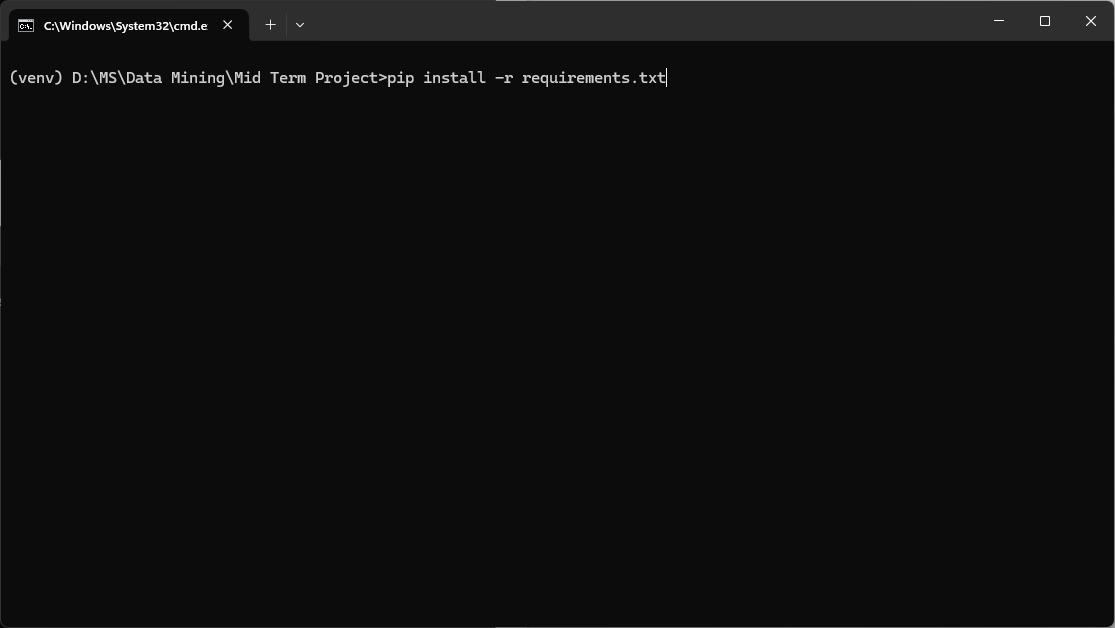

In [348]:
Image("screenshots/1.png")

## Screenshot 2

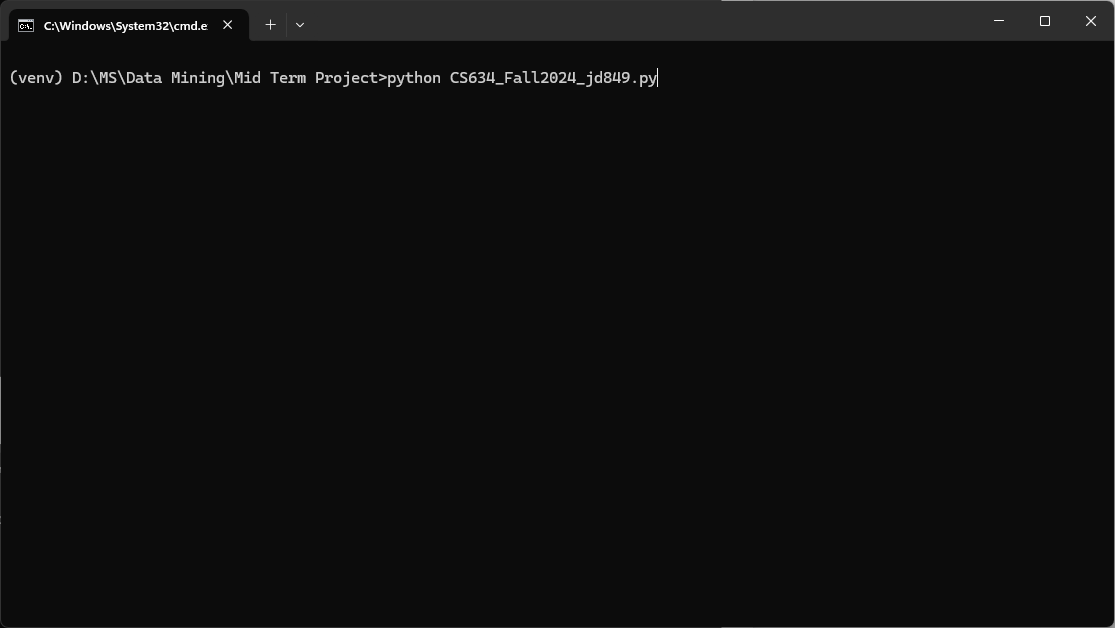

In [349]:
Image("screenshots/2.png")

## Screenshot 3

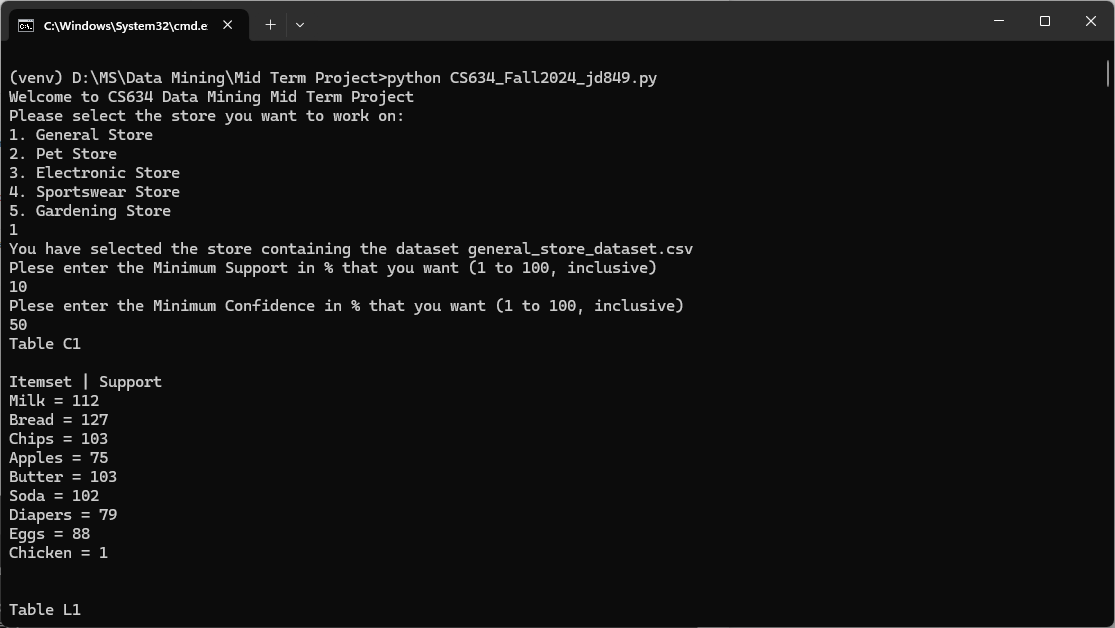

In [350]:
Image("screenshots/3.png")

### Importing the libraries

In [351]:
import time
import pandas as pd
from itertools import combinations, permutations
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

### Datastore Selection
- Prompt the users to select a store.<br>
- There are 5 different datasets, each containing 200 transactions included in the `datasets` folder.
- This dataset is generated using a python script called `create_dataset.py` to generate a large dataset (hundreds or thousands of transactions, but for now we kept 200) with more number of transactions for our project. This python script is included along with the code.
- Implemented a flow control for correct input and discard any invalid input so our program doens't crash.

In [352]:
datasets = {
    1: "general_store_dataset.csv",
    2: "pet_store_dataset.csv",
    3: "electronic_store_dataset.csv",
    4: "sportswear_store_dataset.csv",
    5: "gardening_dataset.csv"
}
dataset = None
print("Welcome to CS634 Data Mining Mid Term Project")
print("Please select the store you want to work on:")
print("1. General Store")
print("2. Pet Store")
print("3. Electronic Store")
print("4. Sportswear Store")
print("5. Gardening Store")

# User input
while not dataset:
    dataset = input()
    # Checking for valid input
    if not dataset.isnumeric():
        print("Enter a valid number from 1 to 5, inclusive")
        dataset = None
        continue
    dataset = int(dataset)
    # Checking for valid input
    if dataset < 1 or dataset > 5:
        dataset = None
        print("Please enter a valid number from 1 to 5, inclusive.")
    else:
        # valid input
        print(f"You have selected the store containing the dataset {datasets[dataset]}")

# load the dataset
filename = f"dataset/{datasets.get(dataset)}" 
df = pd.read_csv(filename)

Welcome to CS634 Data Mining Mid Term Project
Please select the store you want to work on:
1. General Store
2. Pet Store
3. Electronic Store
4. Sportswear Store
5. Gardening Store


 1


You have selected the store containing the dataset general_store_dataset.csv


### Minimum Support and Minimum Confidence
Defining the minimum support and confidence by taking user input.<br>
- We will take an input from the user about the Support and Confidence percent that he wants<br>
- We then multiply the minimum support by the number of transactions in the dataset which gives us the minimum frequency of an item which the items in the itemset need to satisfy, to be considered as a frequent item or an itemset.

In [353]:
MIN_SUPPORT = None
MIN_CONFIDENCE = None

# Taking input for Minimum Support
print("Plese enter the Minimum Support in % that you want (1 to 100, inclusive)")
while not MIN_SUPPORT:
    MIN_SUPPORT = input()
    if not MIN_SUPPORT.isnumeric():
        print("Please enter a valid number from 1 to 100, inclusive")
        MIN_SUPPORT = None
        continue
    MIN_SUPPORT = int(MIN_SUPPORT)
    if MIN_SUPPORT < 1 or MIN_SUPPORT > 100:
        MIN_SUPPORT = None
        print("Please enter a valid number from 1 to 100, inclusive.")
    else:
        MIN_SUPPORT/=100
        
# Taking input for Minimum Confidence
print("Plese enter the Minimum Confidence in % that you want (1 to 100, inclusive)")
while not MIN_CONFIDENCE:
    MIN_CONFIDENCE = input()
    if not MIN_CONFIDENCE.isnumeric():
        print("Enter a valid number from 1 to 100, inclusive")
        MIN_CONFIDENCE = None
        continue
    MIN_CONFIDENCE = int(MIN_CONFIDENCE)
    if MIN_CONFIDENCE < 1 or MIN_CONFIDENCE > 100:
        MIN_CONFIDENCE = None
        print("Please enter a valid number from 1 to 100, inclusive.")
    else:
        MIN_CONFIDENCE/=100
    
# Setting the minimum frequency that an itemset should have
MIN_SUPPORT_COUNT = df.shape[0]*MIN_SUPPORT 

Plese enter the Minimum Support in % that you want (1 to 100, inclusive)


 100


Plese enter the Minimum Confidence in % that you want (1 to 100, inclusive)


 100


### Brute Force Function for Apriori Algorithm

The Apriori algorithm finds frequent itemsets by progressively generating larger item combinations. I used a brute-force method for itemset generation, iterating from 1-itemsets to k-itemsets.<br>
We implement the apriori algorithm. It takes the dataframe and the minimum support as argument and calculates the number of frequent itemsets and stores in the array `frequent_item_sets`. It follows the following steps:<br>
1. First we calculate the frequent_item_sets for k = 1 and store them in frequent_item_sets while maintaining the value of `li` which is our intermediate set.
2. We filter all the itemsets which do no satisfy our criteria of minimum support.
3. This way we keep only the itemsets that match our criteria and then calculate the Frequent Itemsets for all the successing values of k.
4. This way we are able to dynamically generate all the Frequent Itemsets for all the values of k starting from k = 2.<br>
At the end we just print all the Frequent Itemset found at each step and print their corresponding support.

Keeping a count of the rules found by each of our methods to evaluate and compare later

In [354]:
brute_force_rules_count = 0
brute_force_fp_count = 0
library_rules_count = 0 
library_fp_count = 0
library_fptree_count = 0

In [355]:
def brute_force(df, min_support):
    
    global brute_force_fp_count
    k = 1
    c1 = {}
    # itemsets which are frequent
    frequent_item_sets = []

    # keeping a record of the frequent itemsets along with their support
    support_counts = {}

    # generate candidate itemset for k = 1
    for i in range(len(df['ITEM_SET'].values)):
        for item in df['ITEM_SET'].values[i].split(','):
            c1[item] = c1.get(item, 0) + 1

    # generate intermediate itemset for k = 1 which satisfies the Minimum support criteria
    li = [key for key, value in c1.items() if value >= min_support]
    frequent_item_sets += li

    # Print the table c1
    print("Table C1")
    print()
    print("Itemset | Support")
    for key, value in c1.items():
        print(f"{key} = {value}")
    print()
    print()

    # Print the table l1
    print("Table L1")
    print()
    print("Itemset | Support")
    for item in li:
        print(f"{item} = {c1[item]}")

    print()
    print()

    # keeing a track of frequent itemsets and their respective supports
    for item in li:
        support_counts[(item,)] = c1[item]
    
    k = 2
    rows = df['ITEM_SET'].values

    # proceeding ahead from k = 2
    while True:
        # Combination
        comb = combinations(li, k)
        ci = {}
        # Count combination
        for item in comb:
            for row in rows:
                add = True
                for i in range(k):
                    if isinstance(item[i], tuple):
                        # if any item is not in the row, then it is not a frequent_itemset
                        if item[i][0] not in row or item[i][1] not in row:
                            add = False
                            break
                    elif item[i] not in row:
                        add = False
                        break
                if add:
                    if ci.get(item):
                        ci[item] += 1
                    else:
                        ci[item] = 1

        
        li = []
        print(f"Table C{k}")
        print()
        print(f"Itemset | Support")
        
        for key, value in ci.items():
            print(f"{key} = {value}")
        for key, value in ci.items():
            if value >= min_support:
                li.append(key)

        print()
        print()
        print(f"Table L{k}")
        print()
        print(f"Itemset | Support")
        for item in li:
            print(f"{item} = {ci[item]}")
        print()
        print()

        # if the intermediate itemset is empty that means no further itemsets are found and we exit
        if len(li) == 0:
            break
        else:
            frequent_item_sets += li
            support_counts.update({item: ci[item] for item in li})
            li = set([j for i in li for j in i])
            k+=1

    # count of number of items in the frequen itemsets
    brute_force_fp_count = len(frequent_item_sets)

    print(f"The total number of frequent itemsets are {brute_force_fp_count}")
    return frequent_item_sets, support_counts


### Candidate Set Generation Function

We implement the function `generate_candidate_set` to create intermediate candidate set by permutating the items in the frequent itemsets. In this way we can generate all the permutations of the frequent itemsets for association rule mining.<br>

In [356]:
def generate_candidat_set(frequent_item_sets):
    # Generate permutation for each itemset in the frequent itemsets array    
    candidate_set = [perm for item in frequent_item_sets if isinstance(item, tuple) for perm in permutations(item)]
    return candidate_set

### Association Rule Mining Function

Implementing the function to mine Association Rules, provided the frequent itemsets minimum confidence.<br>
Here we first taken the dataframe, frequent itemsets and minimum confidence as arguments to the function.<br>
Then we follow the following steps to find the confidence of each rule:
1. Calculate the number of transactions containing Antecedent and Consequent (consider it as part1)
2. Calculate the number of transactions containing only Antecedent (consider it as part2)
3. Calculate the confidence of a Frequent Itemset by dividing the number of transactions containing both (part1) by the number of transactions containing only Antecedent (part2)
4. Keep only the transactions which satisfy the criteria of minimum confidence for each transaction and filter the rest
5. Print the transactions which satisfy our criteria. These are the association rules. 

In [357]:
def association_rule_mining(df, frequent_itemsets, min_confidence):
    
    # keeping a count of the number of association rules generated by brute force
    global brute_force_rules_count

    rows = df['ITEM_SET'].values
    
    association_rules = {}

    # traversing through all the itemsets from the list of frequent itemsets
    for itemset in frequent_itemsets:
        if isinstance(itemset, tuple) and len(itemset) > 1:
            for k in range(1, len(itemset)):
                antecedents = combinations(itemset, k)  
                
                for antecedent in antecedents:
                    # if X -> then Y, here X is antecedent and Y is consequent
                    antecedent = set(antecedent)
                    consequent = set(itemset) - antecedent  

                    antecedent_count = 0
                    consequent_count = 0
                    
                    # we traverse through all the rows and check if the values are present or not
                    for row in rows:
                        transaction = set(row.split(','))

                        # if antecedent is present increment the antecedent count
                        if antecedent.issubset(transaction):
                            antecedent_count += 1

                            # if the consequent is present increment the consequent count
                            if consequent.issubset(transaction):
                                consequent_count += 1
                    
                    # we check if antecedent is greater than 0, to avoid division by 0
                    if antecedent_count > 0:

                        # calculate confidence by dividing the consequent_count by antecedent count
                        confidence = consequent_count / antecedent_count

                        # Only store the rule if they are greater than the minimum threshold
                        if confidence >= min_confidence:
                            rule = (tuple(sorted(antecedent)), tuple(sorted(consequent)))
                            association_rules[rule] = confidence

    print()
    print("Final Association Rules by Brute Force Method")
    print()
    brute_force_rules_count = len(association_rules)
    print(f"The total number of association rule formed are: {brute_force_rules_count}")
    print()
    i = 1
    # Printing all the associatoin rules and their corresponding confidence values
    for key, val in association_rules.items():
        if val >= min_confidence:
            key = list(key)
            consequent = key[-1]
            antecedent = key[:-1]
            print(f"Rule {i}")
            print(f"{antecedent} --> {consequent[0]}")
            print(f"Confidence = {val:.2f}")
            print()
            i += 1


### Executing Brute Force

Executing the apriori algorithm, generating candidate sets and executing association_rule_mining function to find the time comparison between each function and find out Frequent Patterns and Association Rules from our Dataset.

In [358]:
# Frequent Itemsets Mining using Brute Force
start_time = time.time()
frequent_item_sets, support_counts = brute_force(df, MIN_SUPPORT_COUNT)
end_time = time.time()

# Time taken by brute force apriori algorithm to run
brute_force_apriori_time = end_time - start_time

# Generating candidate set by permutating the frequent itemsets
candidate_set = generate_candidat_set(frequent_item_sets)

# Association Rule Mining on our candidate set
start_time = time.time()
association_rules = association_rule_mining(df, candidate_set, MIN_CONFIDENCE)
end_time = time.time()

# Time taken by Brute force association rule mining to run
brute_force_associationrules_time = end_time - start_time

Table C1

Itemset | Support
Milk = 112
Bread = 127
Chips = 103
Apples = 75
Butter = 103
Soda = 102
Diapers = 79
Eggs = 88
Chicken = 1


Table L1

Itemset | Support


Table C2

Itemset | Support


Table L2

Itemset | Support


The total number of frequent itemsets are 0

Final Association Rules by Brute Force Method

The total number of association rule formed are: 0



In [359]:
print(f"Brute Force Apriori algorithm time: {brute_force_apriori_time:.4f} seconds")
print()
print(f"Brute Force Association Rule Mining time: {brute_force_associationrules_time:.4f} seconds")
print()
print()

Brute Force Apriori algorithm time: 0.0010 seconds

Brute Force Association Rule Mining time: 0.0000 seconds




## Frequent Pattern and Association Rule Mining using Python Libraries

In [360]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

Read the dataset perform preprocessing

In [361]:
df = pd.read_csv(filename)
data = df['ITEM_SET'].apply(lambda x: x.split(',')).tolist()

In [362]:
te = TransactionEncoder()
encoded_data = te.fit(data).transform(data)
df_encoded = pd.DataFrame(encoded_data, columns=te.columns_)

### Frequent Itemset Mining using mlxtend Apriori Algorithm

Implementing the function to print the Frequent Itemsets that are found from the Apriori Algorithm.

In [363]:
def print_frequent_itemsets_apriori(frequent_itemsets):
    global library_fp_count 
    # Get the maximum size of the itemsets present 
    max_level = frequent_itemsets['length'].max()
    library_fp_count = frequent_itemsets.shape[0]
    if isinstance(max_level, float):
        print("No frequent itemsets")
    else:
        for level in range(1, max_level + 1):
            print(f"Table C{level}")
            print("\nItemset | Count")
            level_itemsets = frequent_itemsets[frequent_itemsets['length'] == level]
            for index, row in level_itemsets.iterrows():
                itemset = tuple(row['itemsets'])
                count = row['support'] * len(df_encoded)  
                print(f"{itemset} = {int(count)}")
            print()  

We time the start time and end time to determine the total time taken by the algorithm to run.<br>
Execute the apriori algorithm that we improted from mlxtend library and note the time taken

In [364]:
# Executing the apriori algorithm by MLXTend library and recording the time
start_time = time.time()
frequent_itemsets_apriori = apriori(df_encoded, min_support=MIN_SUPPORT, use_colnames=True)
frequent_itemsets_apriori['length'] = frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x))
print_frequent_itemsets_apriori(frequent_itemsets_apriori)
end_time = time.time()

# storing the time
mlxtend_apriori_time = end_time-start_time

print()
print(f"Using mlxtend Apriori algorithm time: {mlxtend_apriori_time:.4f} seconds")

No frequent itemsets

Using mlxtend Apriori algorithm time: 0.0024 seconds


### Association Rule Mining using mlxtend Association Rule Algorithm

Implement the `print_association_rules` function to print all the associtation rules mined using the mlxtend library.
Here we use the association_rules function from the mlxtend library to find the association rules, which are mined from the frequent item sets that we found earlier.

In [365]:
def print_association_rules(rules):
    global library_rules_count
    print("Final Association Rules by using the Library\n")
    library_rules_count = rules.shape[0]
    for index, rule in rules.iterrows():
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])[0]
        confidence = rule['confidence']
        print(f"Rule {index + 1}")
        print(f"{antecedents} --> {consequents}")
        print(f"Confidence = {confidence:.2f}\n")

Executing the association_rules function from mlx_tend and noting our timetaken for finding the rules and printing them

In [366]:
if frequent_itemsets_apriori.shape[0] != 0:
    start_time = time.time()
    rules = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=MIN_CONFIDENCE)
    print_association_rules(rules)
    end_time = time.time()
    mlxtend_association_rules_time = end_time - start_time
    print(f"mlxtend Association Rule Mining time: {end_time - start_time:.4f} seconds")
else:
    mlxtend_association_rules_time = 0
    print("No association rules")

No association rules


## Frequent Pattern Mining using mlxtend FP Growth Algorithm from mlxtend Library

Implement the print function for Frequent Item sets mined using the FP Tree algorithm from MLXTend Library

In [367]:
def print_fp_growth_itemsets(frequent_itemsets_fp):
    global library_fptree_count
    library_fptree_count = frequent_itemsets_fp.shape[0]
    print("\nFrequent Itemsets using FP-Growth:")
    print("Itemset | Support")
    library_fptree_count = frequent_itemsets_fp.shape[0]
    if library_fptree_count == 0:
        print("No frequent Itemsets found")
        return 
    for index, row in frequent_itemsets_fp.iterrows():
        itemset = tuple(row['itemsets'])
        support = row['support']
        print(f"{itemset} = {support:.2f}")

Executing and finding frequent items using FP Tree algorithm

In [368]:
start_time = time.time()

frequent_itemsets_fp = fpgrowth(df_encoded, min_support=MIN_SUPPORT, use_colnames=True)
print_fp_growth_itemsets(frequent_itemsets_fp)

end_time = time.time()

mlxtend_fptree_time = end_time-start_time

print(f"FP-Growth time: {end_time - start_time:.4f} seconds")


Frequent Itemsets using FP-Growth:
Itemset | Support
No frequent Itemsets found
FP-Growth time: 0.0018 seconds


Executing the association_rules function from mlx_tend and noting our timetaken for finding the rules and printing them

In [369]:
print()
print()

## Evaluation and Comparison of our Algorithm 

In [370]:
print()
print('----------------------------------')
print("Time taken by all the algorithms:")
print()


----------------------------------
Time taken by all the algorithms:



In [371]:
data = [
    ['Brute Force Apriori', brute_force_apriori_time],
    ['Brute Force Association Rule', brute_force_associationrules_time],
    ['MLXTend Apriori', mlxtend_apriori_time],
    ['MLXTend FP Growth', mlxtend_fptree_time],
    ['MLXTend Association Rule', mlxtend_association_rules_time],
]

time_df = pd.DataFrame(data, columns=['Algorithm', 'Time (seconds)'])
print(time_df)

                      Algorithm  Time (seconds)
0           Brute Force Apriori        0.001000
1  Brute Force Association Rule        0.000000
2               MLXTend Apriori        0.002373
3             MLXTend FP Growth        0.001786
4      MLXTend Association Rule        0.002617


In [372]:
print()
print('----------------------------------')
print("Number of Frequent Itemsets Mined:")
print()


----------------------------------
Number of Frequent Itemsets Mined:



In [373]:
data = [
    ['Brute Force Apriori', brute_force_fp_count],
    ['MLXTend Apriori', library_fp_count],
    ['MLXTend FP Growth', library_fptree_count],
]

time_df = pd.DataFrame(data, columns=['Algorithm', 'Frequent Patterns Count'])
print(time_df)

             Algorithm  Frequent Patterns Count
0  Brute Force Apriori                        0
1      MLXTend Apriori                        0
2    MLXTend FP Growth                        0


In [374]:
print()
print('----------------------------------')
print("Number of Association Rules Mined:")
print()


----------------------------------
Number of Association Rules Mined:



In [375]:
data = [
    ['Brute Force Association Rule Count', brute_force_rules_count],
    ['MLXTend Association Rule Count', library_rules_count],
]

time_df = pd.DataFrame(data, columns=['Algorithm', 'Rule Count'])
print(time_df)

                            Algorithm  Rule Count
0  Brute Force Association Rule Count           0
1      MLXTend Association Rule Count           0


## Observations

1. We can see that we have successfully created Apriori algorithm and Association Rule Mining algorithm using Brute Force approach which yields correct output
2. We have also implemeted the both the algorithms and FP-Growth algorithm using MLXTend library and validated our data.
3. The prebuilt library are optimized hence they can be seen performing better than our implemented brute force approach.
4. We have also implemeted the FP-Growth algorithm using the MLXTend library and it can be obvserved that it works faster compared to Apriori algorithm even when both of them are optimized.

## Conclusion

In conclusion, we can say that our project successfully demonstrates the concepts of Apriori Algorithm, Association Rule Mining and methods. We have successfully implement the Apriori algorithm from scratch to mine Association Rules from different datasets. Our brute force method works exceptionally well while taking the user defined parameters from input. In this way we are able to reveal patterns from our dataset and mine association rules which can help in decision making in the industry. We can conclude from our observations that FP-Growth algorithm is an faster and more efficient at Mining Frequent Patterns than Apriori algorithm.

## Github Repository Link

jd849@njit.edu -> [Github Repository Link](https://github.com/jaysheeldodianjit/CS634_MidtermProject)

## *Screenshots of Implementation in Jupyter Notebook*

The below image is a sample of our entire `General Store` dataset

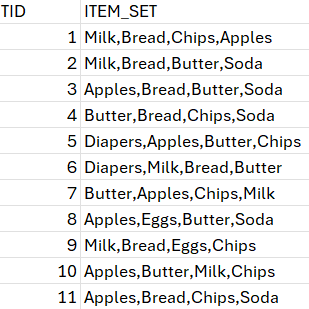

In [376]:
Image("screenshots/10.png")

Prompt the user to choose the store for our dataset

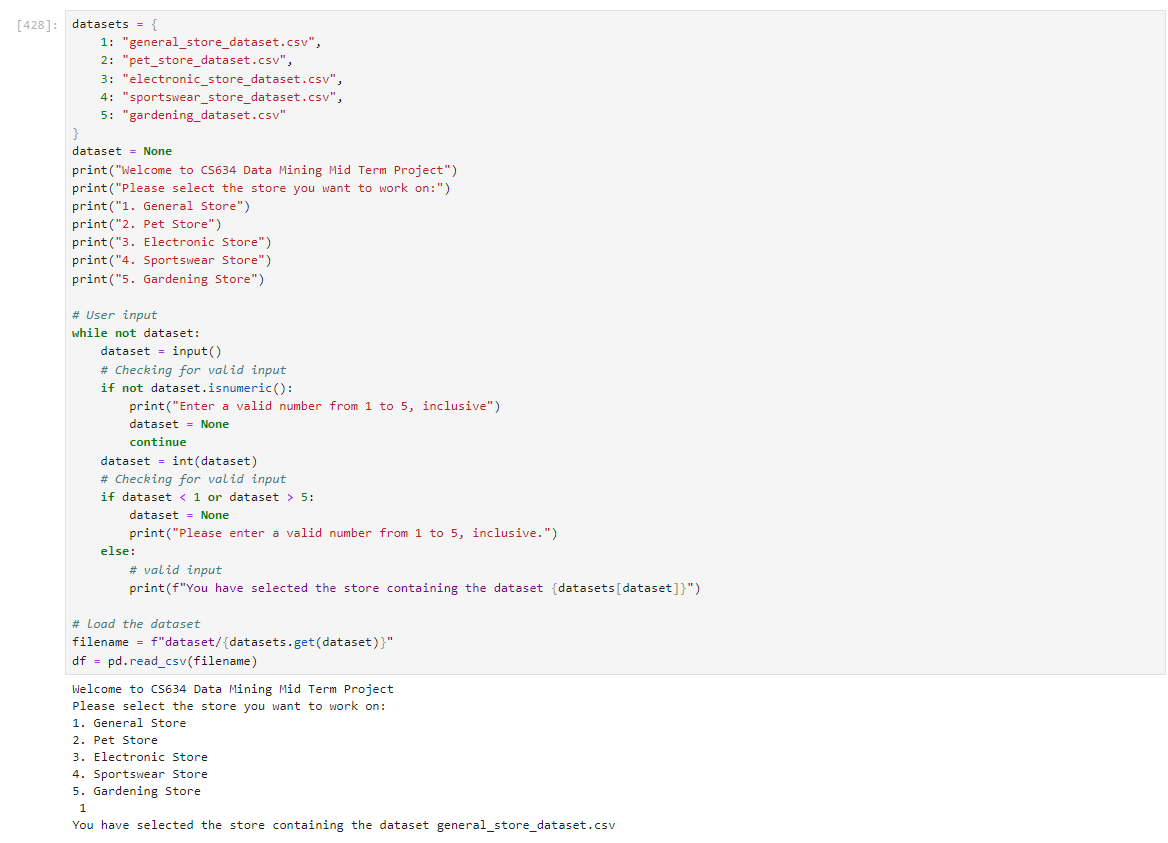

In [377]:
Image("screenshots/11.png")

Keeping the count of rules and frequent patterns mined

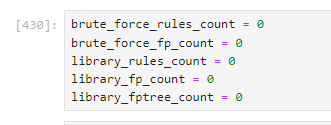

In [378]:
Image("screenshots/13.png")

Prompt the user for input of Minimum Support Percentage and Minimum Confidence Percentage

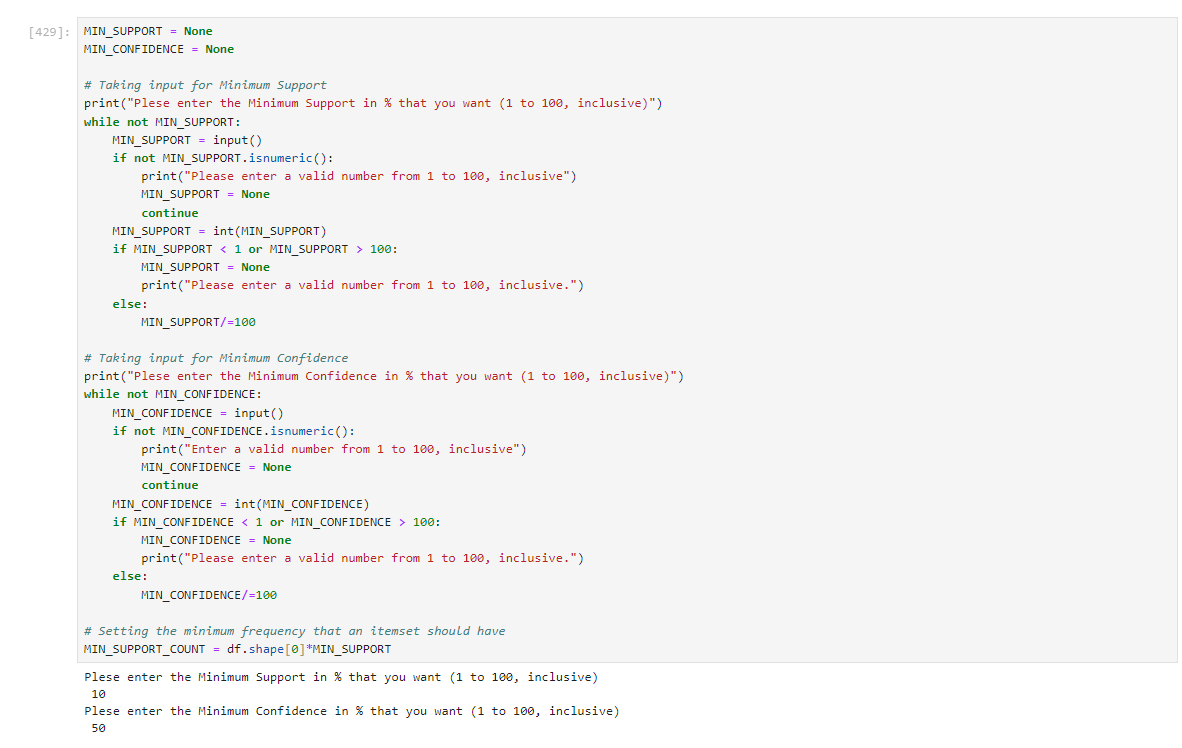

In [379]:
Image("screenshots/12.png")

Defining the brute force apriori algorithm

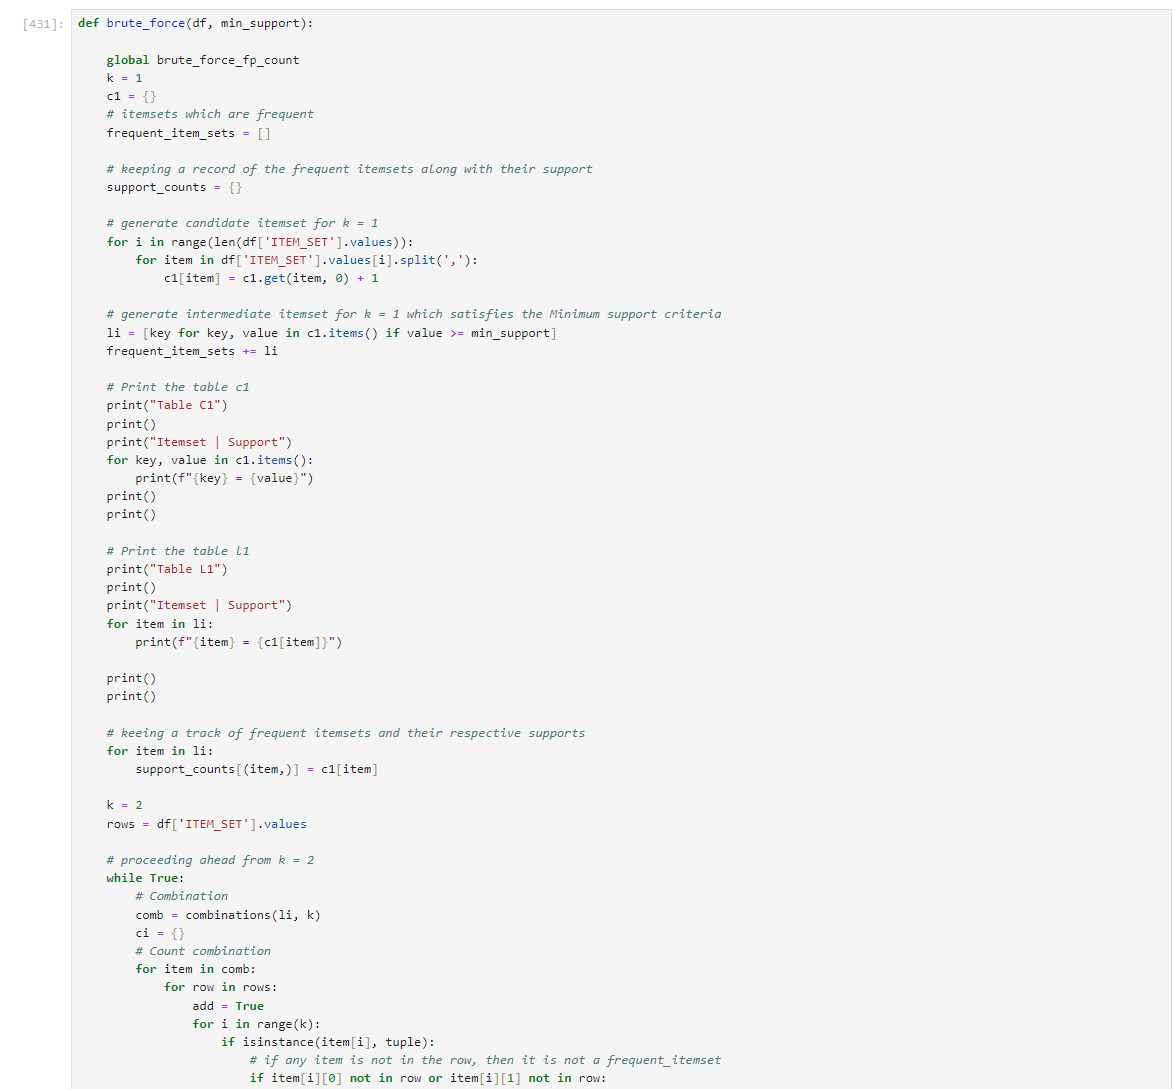

In [380]:
Image("screenshots/14.png")


Continuation of the above brute force code

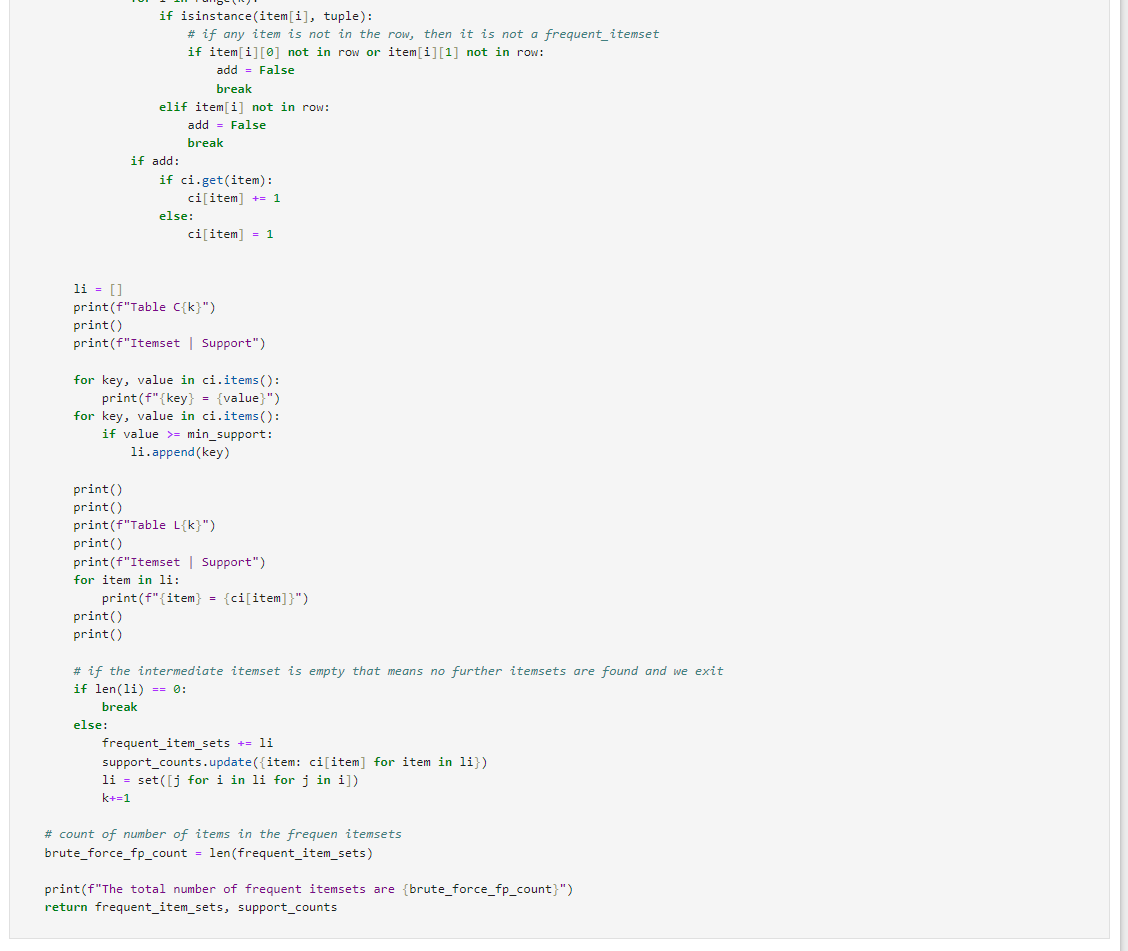

In [381]:
Image("screenshots/15.png")

Function to generate candidate set which consists of permutated frequent itemsets

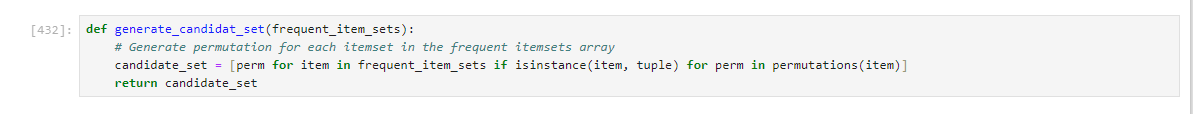

In [382]:
Image("screenshots/16.png")

Defining the association_rule_mining algorithm using brute force

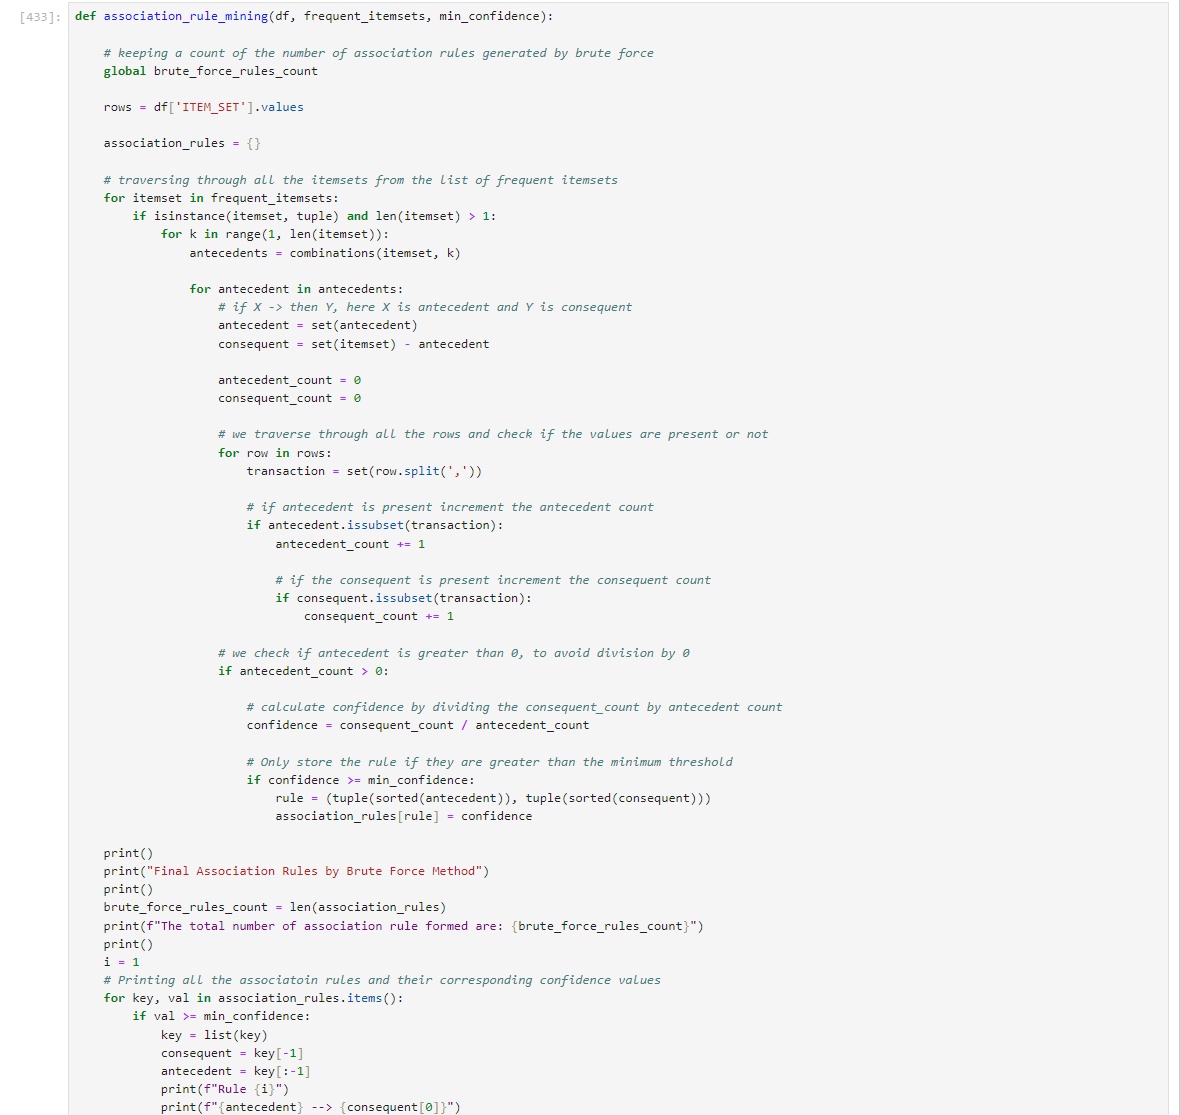

In [383]:
Image("screenshots/17.png")

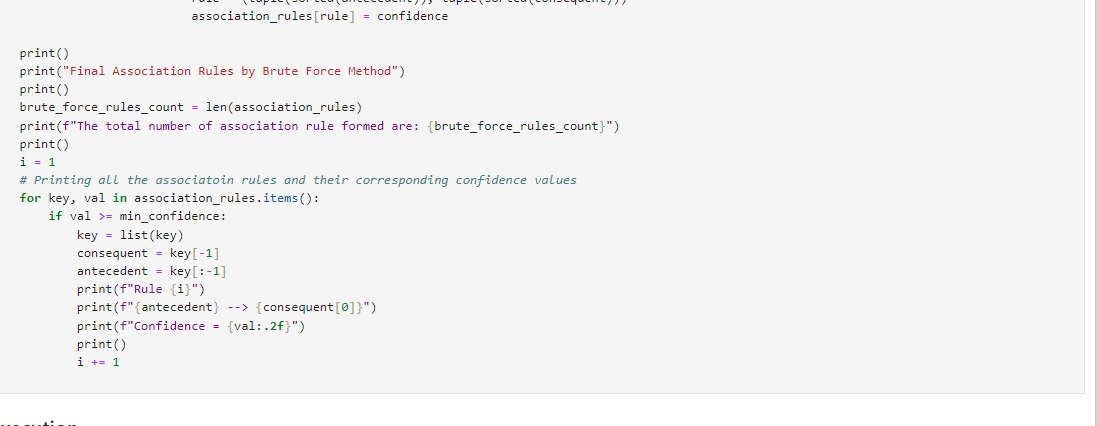

In [384]:
# Continuation of the above
Image("screenshots/18.png")

### Executing our brute force algorithm and recording the time

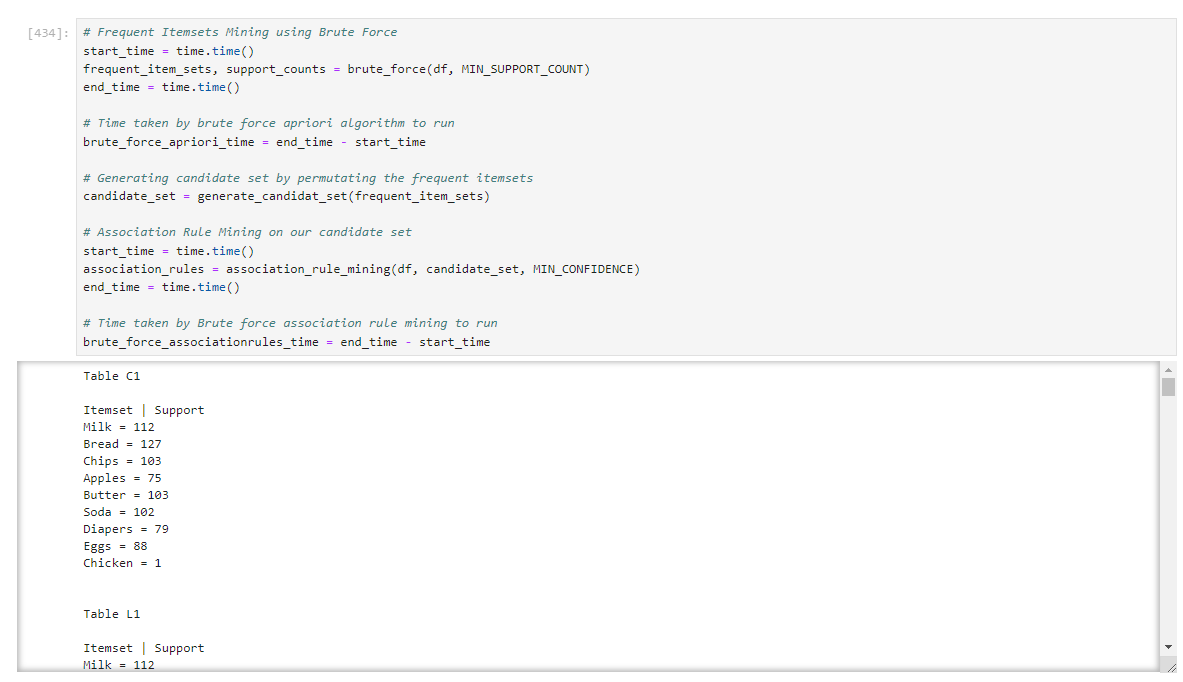

In [385]:
Image("screenshots/19.png")

### Executing prebuilt library for association rule mining and frequent pattern mining

Defining the function for printing Apriori Algorithm and executing it

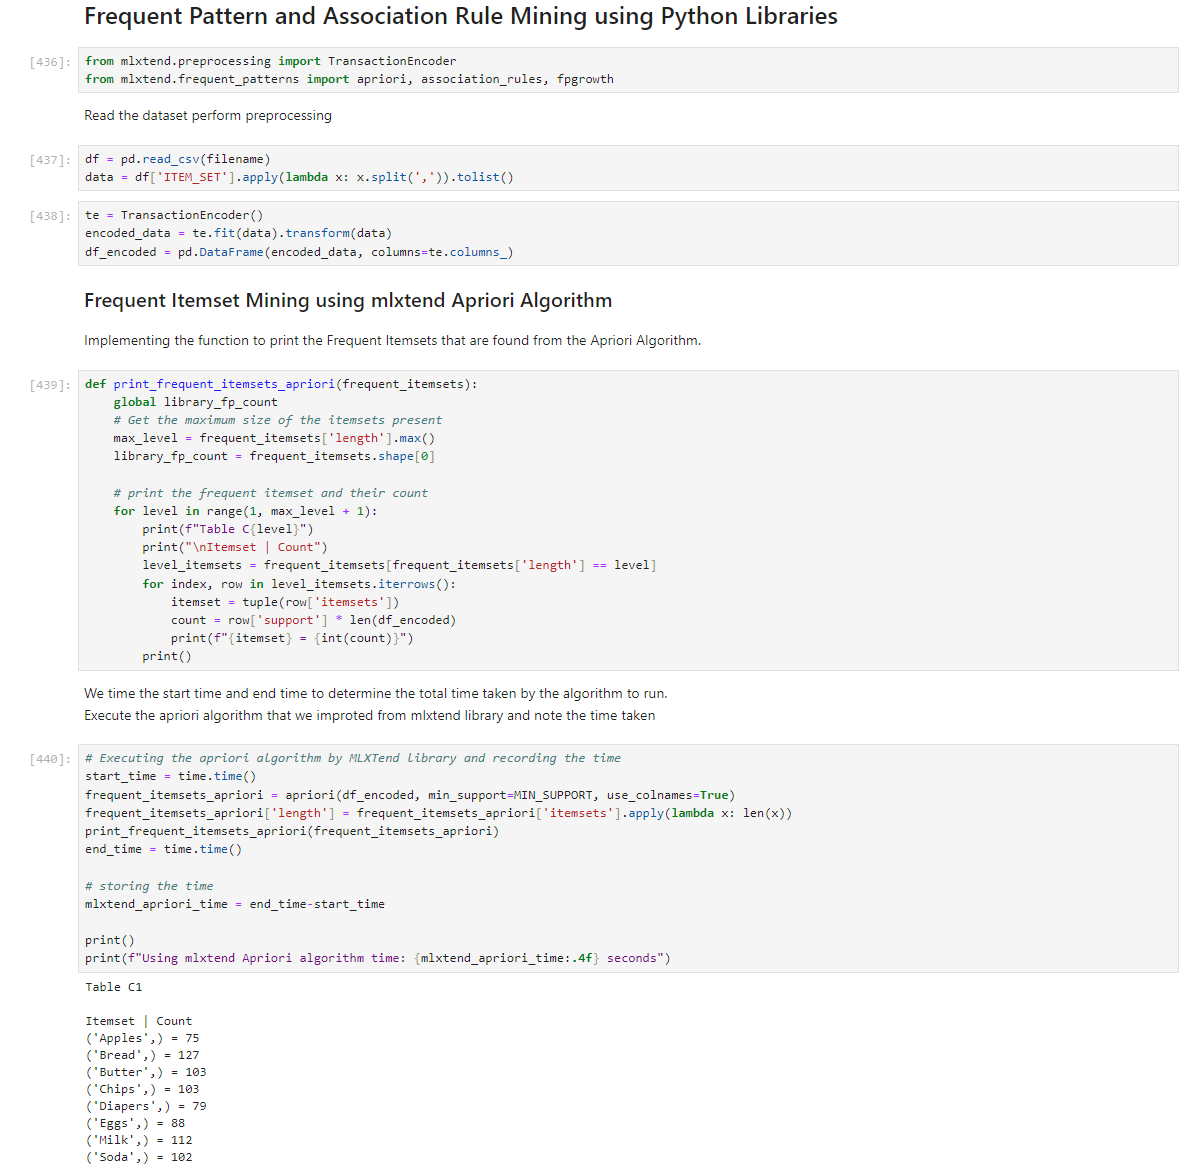

In [386]:
Image("screenshots/20.png")

Implementing the function to print association rules using mlxtend library and executing it

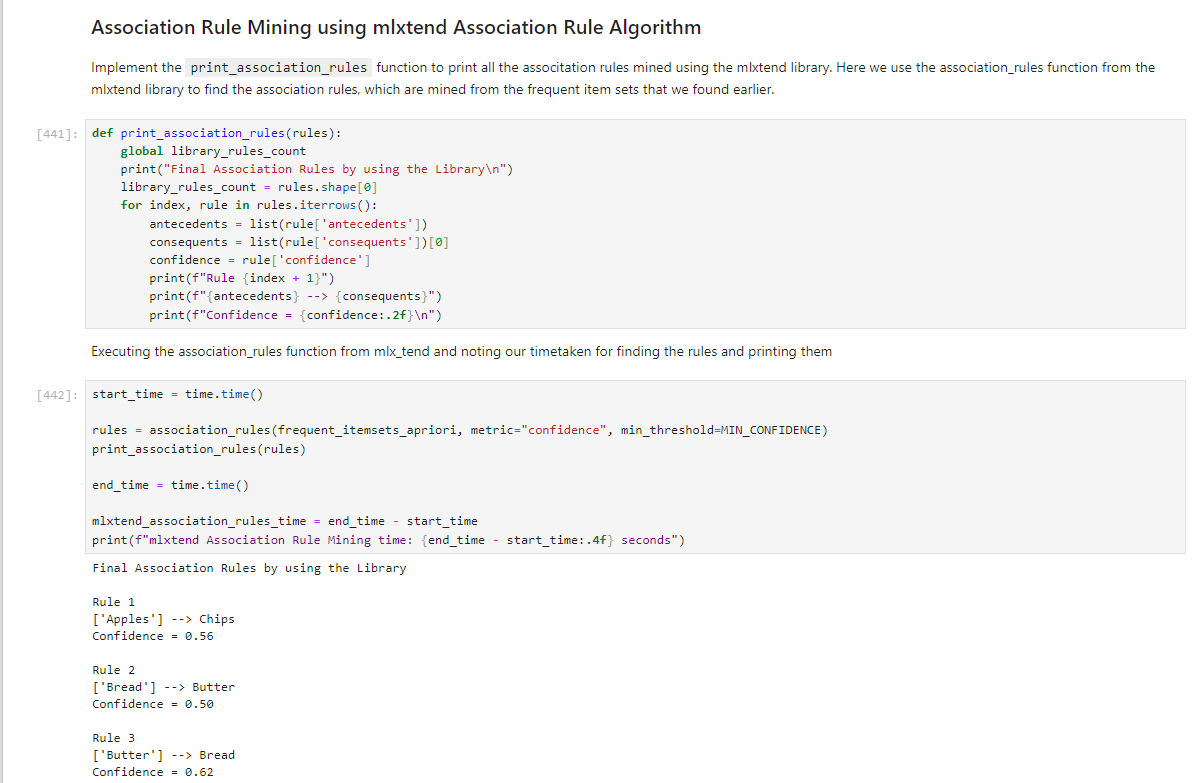

In [387]:
Image("screenshots/21.png")


Implementing the function to print frequent itemsets using FP-Tree algorithm adn then running it

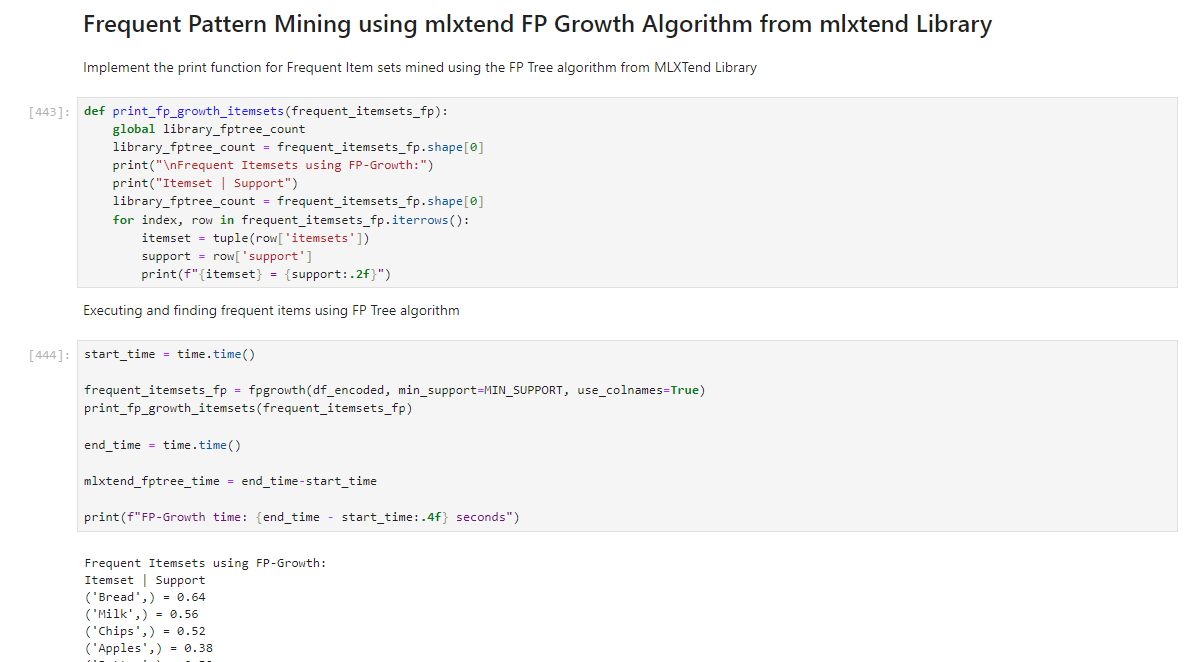

In [388]:
Image("screenshots/22.png")

### Performance evaluation and comparison

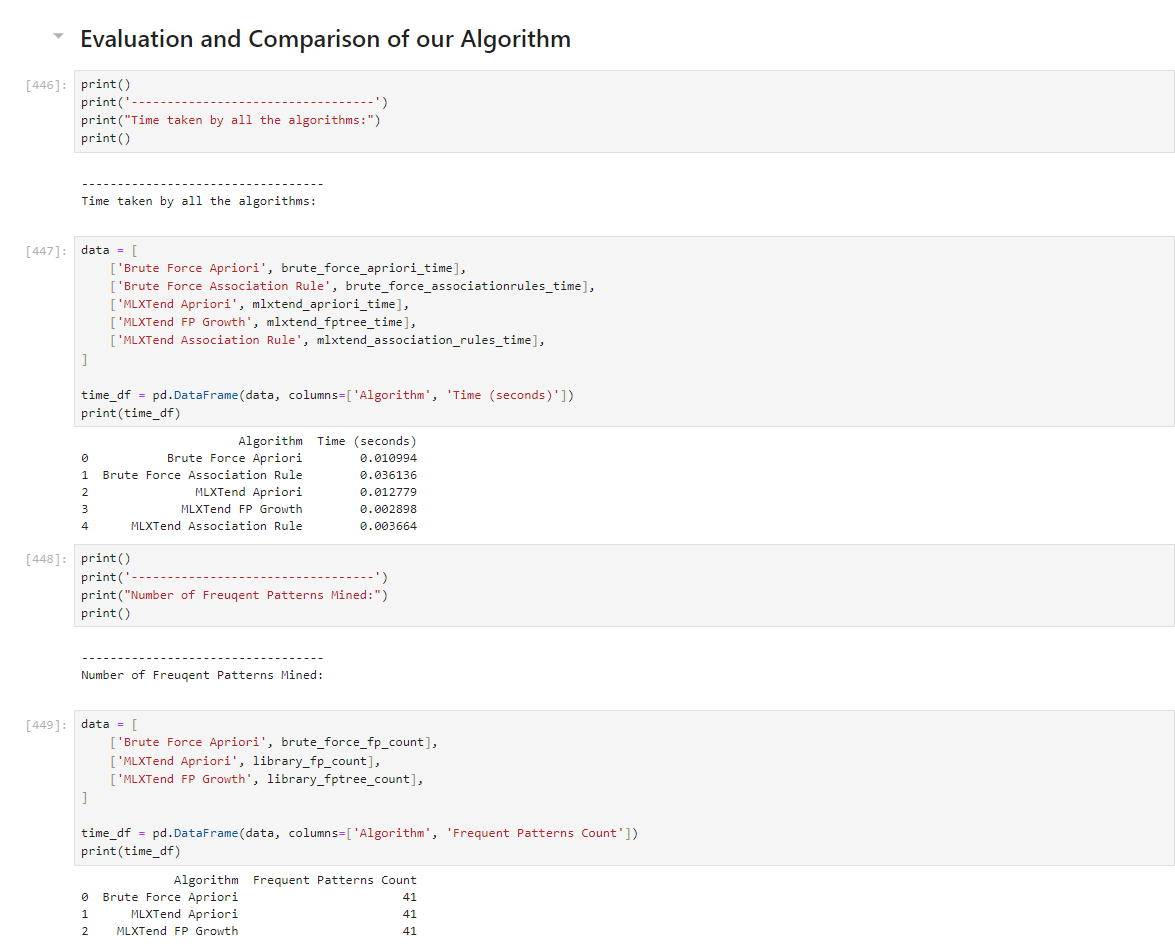

In [389]:
Image("screenshots/23.png")

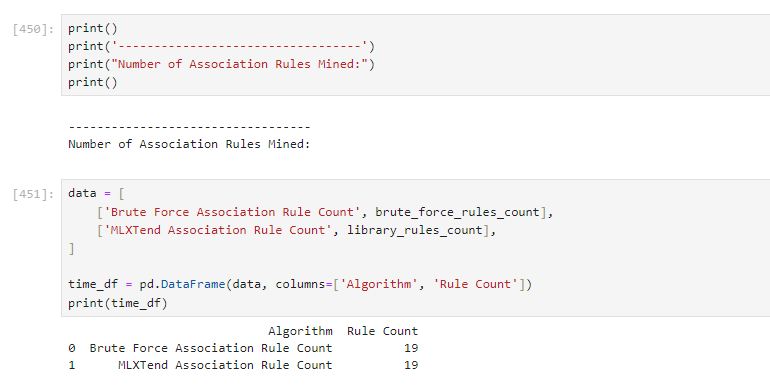

In [390]:
Image("screenshots/24.png")

## *Screenshots of Execution of Python file*

### Running on the dataset `General Store`
- Minimum support = 10%
- Minimum confidence = 50%

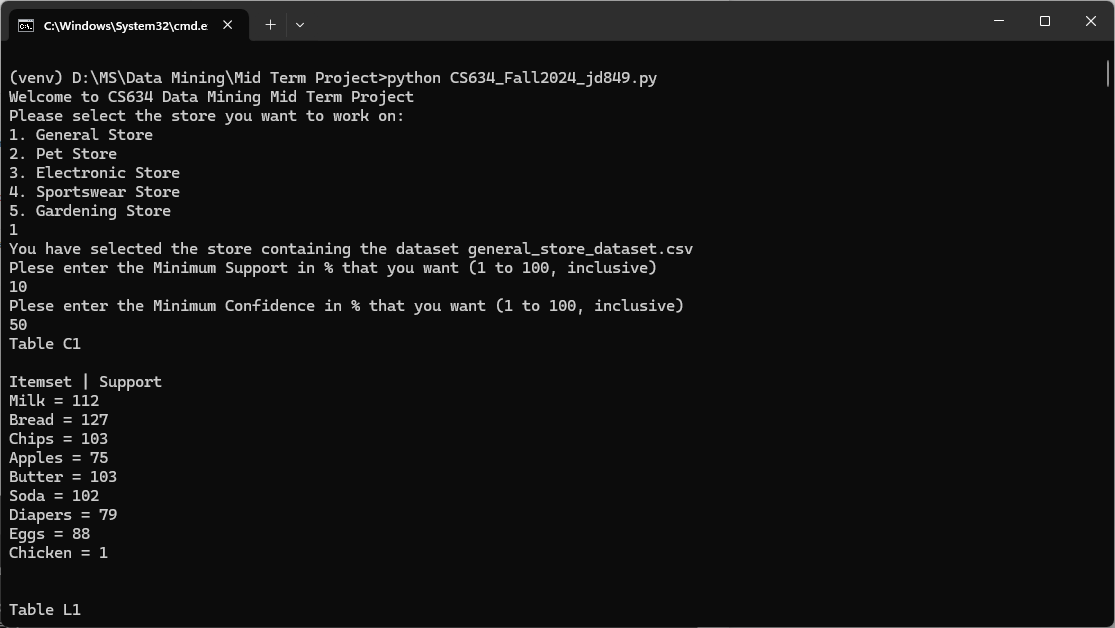

In [391]:
Image("screenshots/3.png")

Candidate set vs the frequently mined items

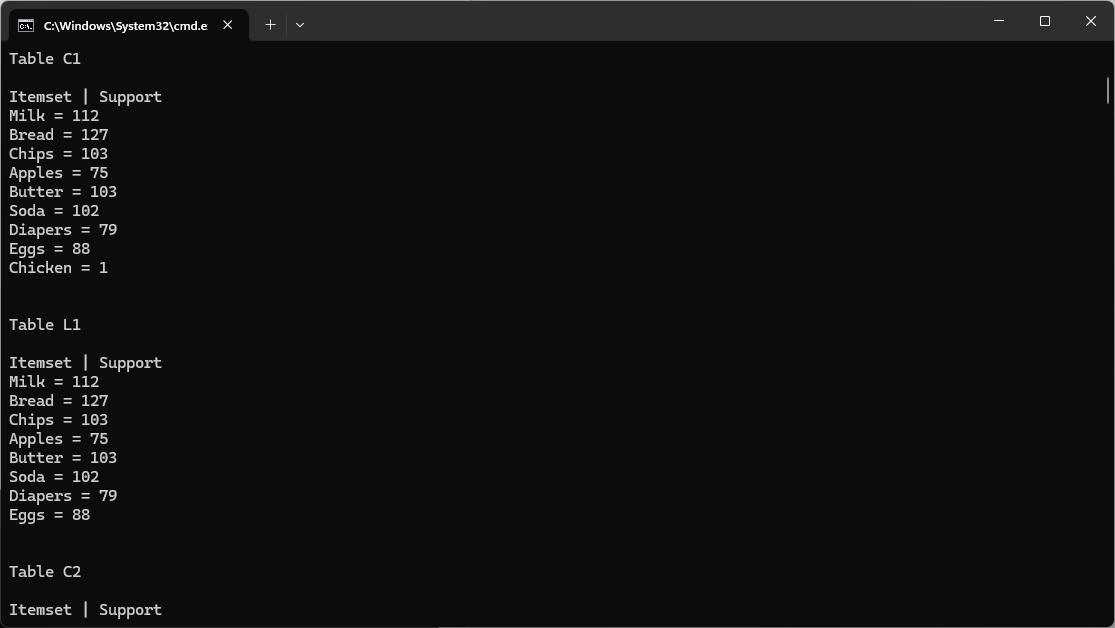

In [392]:
Image("screenshots/6.png")

Association rules generated by brute force method

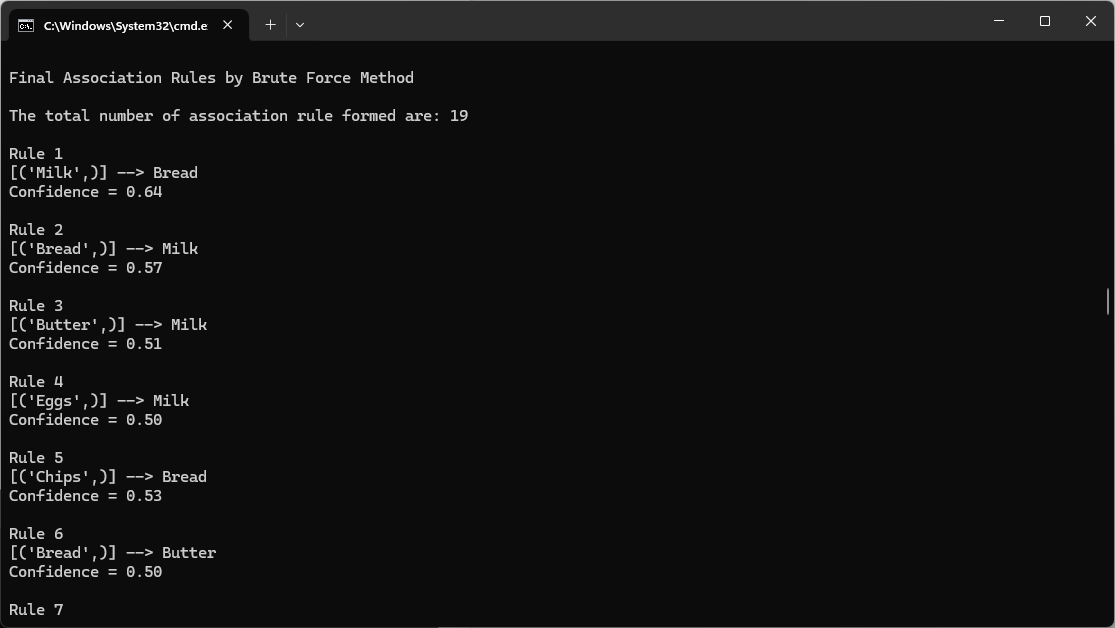

In [393]:
Image("screenshots/7.png")

Association rules generated by mlxtend library

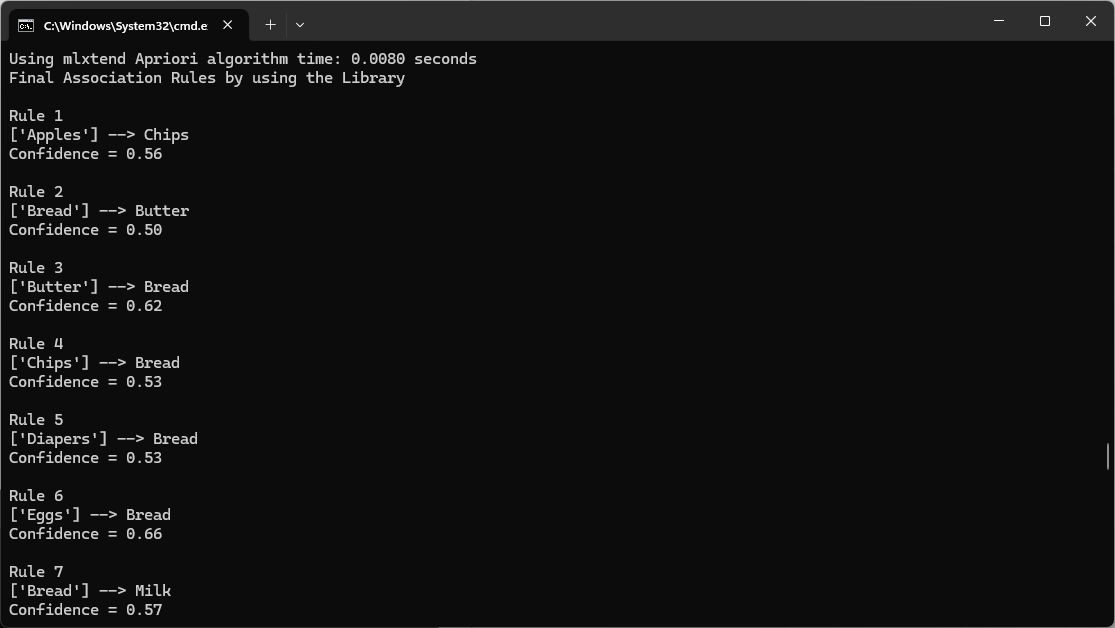

In [394]:
Image("screenshots/8.png")

Comparison between brute force and mlxtend library

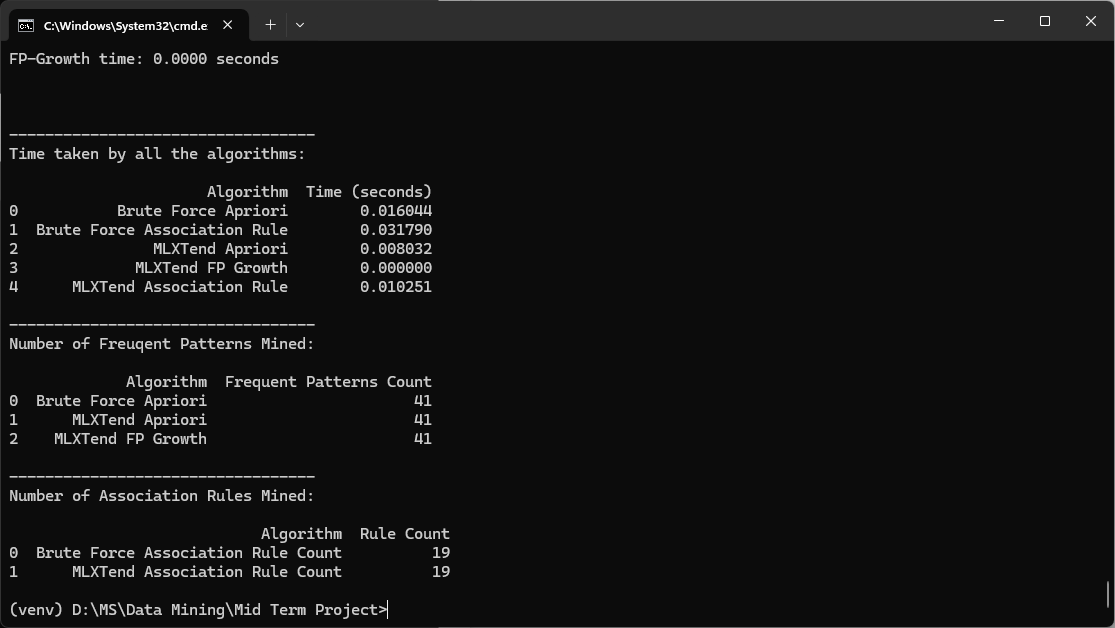

In [395]:
Image("screenshots/9.png")

## *Output* 
The output of executions show us that the association rules formed by Brute Force Method and that by using mlxtend library are the same.<br>
When compared the count of Frequent Itemsets and that of the Association Rules is the same for both the methods.<br>
This way we upon comparison, we find that the association rules generated by brute force are verifiable by the ones generated by the built-in package.

## Other

The source code (.py file) and data sets (.csv files) will be attached to the zip file.<br><br>
*Link to GitHub repository*<br>
[https://github.com/jaysheeldodianjit/CS634_MidtermProject](https://github.com/jaysheeldodianjit/CS634_MidtermProject)